In [9]:
## Titanic survival predictor - Support Vector Machine

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

# Load CSV from relative path
df = pd.read_csv('titanic/train.csv')
print("### Head:\n", df.head())
print("\n### Info:\n")
df.info()
print("\n### Describe:\n")
print(df.describe())

### Head:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN   

In [11]:
#Understand the Data through visual represenntations

<Axes: title={'center': 'Survival Count'}, xlabel='Survived'>

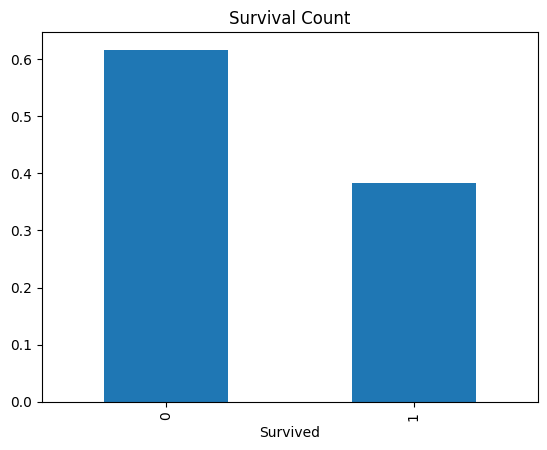

In [12]:
df['Survived'].value_counts(normalize=True).plot(kind='bar', title="Survival Count")

In [13]:
print(df.groupby('Sex')['Survived'].mean() , "\n")
print(df.groupby('Pclass')['Survived'].mean(), "\n")
print(df.groupby('Embarked')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64 

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64 

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


Pclass             -0.338481
Age                -0.077221
SibSp              -0.035322
Parch               0.081629
Fare                0.257307
Embarked_encoded    0.108669
Sex_encoded         0.543351
Name: Survived, dtype: float64


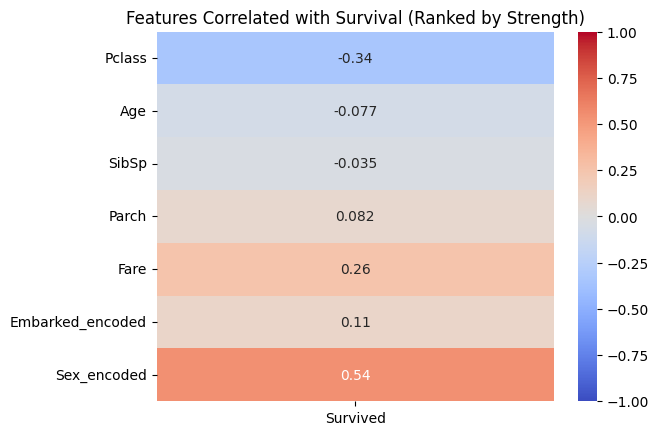

In [21]:
## Encode Sex as numerical values
df['Sex_encoded'] = df['Sex'].map({'male': 0, 'female': 1})

## Encode Embarcked as a numerical value
df['Embarked_encoded'] = df['Embarked'].map({'S': -1, 'C': 0, 'Q': 1})

## Create Correlation matrix of data
corr_matrix = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Embarked_encoded', 'Sex_encoded']].corr()
survived_corr = corr_matrix.loc['Survived'].drop('Survived')
print(survived_corr)

# Plot  heatmap
sea.heatmap(survived_corr.to_frame(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Features Correlated with Survival (Ranked by Strength)")
plt.show()
